<a href="https://colab.research.google.com/github/aneeshahehe/Traffic-prediction/blob/main/Traffic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Traffic project/traffic_weather.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())

       5 Minutes  Flow  (mph)  week_day  holidays           Hour       Day  \
0  2/1/2020 0:00   338   66.0         6         1  2/1/2020 0:00  2/1/2020   
1  2/1/2020 0:05   360   65.5         6         1  2/1/2020 0:05  2/1/2020   
2  2/1/2020 0:10   347   65.2         6         1  2/1/2020 0:10  2/1/2020   
3  2/1/2020 0:15   337   65.4         6         1  2/1/2020 0:15  2/1/2020   
4  2/1/2020 0:20   302   66.3         6         1  2/1/2020 0:20  2/1/2020   

    Time Temperature Dew Point  Humidity Wind Wind Speed Wind Gust  Pressure  \
0  12:00        55 F      29 F      37.0  VAR          3         0     29.39   
1  12:00        55 F      29 F      37.0  VAR          3         0     29.39   
2  12:00        55 F      29 F      37.0  VAR          3         0     29.39   
3  12:00        55 F      29 F      37.0  VAR          3         0     29.39   
4  12:00        55 F      29 F      37.0  VAR          3         0     29.39   

   Precip. Condition  
0      0.0      Fair  
1   

<ipython-input-6-4e99b65d6a99>:6: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
#Step 1: Preprocessing
# 1.1 Convert '5 minutes' to Datetime64 format

import pandas as pd
df['5 Minutes'] = pd.to_datetime(df['5 Minutes'], format='%m/%d/%Y %H:%M')

df.head()



,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2020-02-01 00:00:00,338,66.0,6,1,2/1/2020 0:00,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
1,2020-02-01 00:05:00,360,65.5,6,1,2/1/2020 0:05,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
2,2020-02-01 00:10:00,347,65.2,6,1,2/1/2020 0:10,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
3,2020-02-01 00:15:00,337,65.4,6,1,2/1/2020 0:15,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
4,2020-02-01 00:20:00,302,66.3,6,1,2/1/2020 0:20,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair


In [ ]:
# 1.2 Extract hour and weekday

df['Hour'] = df['5 Minutes'].dt.hour
df['Day'] = df['5 Minutes'].dt.date

# Map numeric days to descriptive names
# days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
#             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# df['week_day'] = df['week_day'].map(days_map)


df.head()



,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2020-02-01 00:00:00,338,66.0,6,1,0,2020-02-01,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
1,2020-02-01 00:05:00,360,65.5,6,1,0,2020-02-01,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
2,2020-02-01 00:10:00,347,65.2,6,1,0,2020-02-01,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
3,2020-02-01 00:15:00,337,65.4,6,1,0,2020-02-01,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
4,2020-02-01 00:20:00,302,66.3,6,1,0,2020-02-01,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair


In [ ]:
# 1.3 cleaning redundant weather columns

df['Temperature'] = df['Temperature'].astype(str).str.replace('F', '', regex=False).str.replace(' ', '', regex=False).str.replace('\xa0', '', regex=False).astype(float)
df['Dew Point'] = df['Dew Point'].astype(str).str.replace('F', '', regex=False).str.replace(' ', '', regex=False).str.replace('\xa0', '', regex=False).astype(float)
# Drop unnecessary duplicate columns
df = df.drop(['Hour.1', 'Day.1'], axis=1, errors='ignore')
df.head()

,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2020-02-01 00:00:00,338,66.0,6,1,0,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair
1,2020-02-01 00:05:00,360,65.5,6,1,0,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair
2,2020-02-01 00:10:00,347,65.2,6,1,0,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair
3,2020-02-01 00:15:00,337,65.4,6,1,0,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair
4,2020-02-01 00:20:00,302,66.3,6,1,0,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair


In [ ]:
# 1.4 Group data by hour

print(df.columns)
hourly_traffic = df.groupby('Hour')['Flow'].mean()

hourly_traffic = hourly_traffic.rename('Hourly Traffic')
print(hourly_traffic)


Index(['5 Minutes', 'Flow', '(mph)', 'week_day', 'holidays', 'Hour', 'Day',
       'Time', 'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed',
       'Wind Gust', 'Pressure', 'Precip.', 'Condition'],
      dtype='object')
Hour
0     205.461806
1     167.836777
2     152.788194
3     152.080579
4     186.521350
5     306.704545
6     418.337466
7     445.690771
8     457.696970
9     482.197795
10    513.193526
11    537.316116
12    554.272727
13    562.920110
14    573.508953
15    584.710055
16    581.067493
17    561.326446
18    510.820248
19    468.994490
20    423.780992
21    378.450413
22    322.770661
23    257.646694
Name: Hourly Traffic, dtype: float64


In [ ]:
# 1.5 Identify missing data

print(df.isnull().sum())

5 Minutes        0
Flow             0
(mph)            0
week_day         0
holidays         0
Hour             0
Day              0
Time             0
Temperature      0
Dew Point        0
Humidity         0
Wind           168
Wind Speed       0
Wind Gust        0
Pressure         0
Precip.          0
Condition       24
dtype: int64


In [ ]:
import numpy as np
import pandas as pd

def min_max_impute(column):
    """Perform min-max imputation for a numeric column."""
    # Convert the column to numeric, handling errors by coercing to NaN
    column = pd.to_numeric(column, errors='coerce')

    # Handle potential inf values
    column = column[np.isfinite(column)]

    col_min = column.min()
    col_max = column.max()

    # Check for valid range
    if not np.isfinite(col_min) or not np.isfinite(col_max):
        # Handle cases where min/max are not finite (e.g., all NaNs)
        # You might want to use a different imputation strategy here
        return column.fillna(column.mean())  # Or other suitable imputation

    # Replace missing values with random values between min and max
    column_imputed = column.apply(lambda x: np.random.uniform(col_min, col_max) if pd.isnull(x) else x)
    return column_imputed

# Apply min-max imputation for the 'week_day' column
df['week_day'] = min_max_impute(df['week_day'])

# Apply min-max imputation for the 'Wind' column after converting to numeric
df['Wind'] = min_max_impute(df['Wind'])

#round off to nearest integer
df['week_day'] = df['week_day'].apply(lambda x: round(x))

print(df['week_day'].isnull().sum())

0


In [ ]:
# 1.5.2 Imputing Wind and Condition columns taking the most frequent value (modes)

# Check if the mode Series is empty before accessing element 0
wind_mode = df['Wind'].mode()
if not wind_mode.empty:
    df['Wind'].fillna(wind_mode[0], inplace=True)
else:
    # Handle the case where mode is empty (e.g., impute with a different value)
    df['Wind'].fillna(df['Wind'].mean(), inplace=True)  # Or another imputation strategy

# Similar check for 'Condition' column
condition_mode = df['Condition'].mode()
if not condition_mode.empty:
    df['Condition'].fillna(condition_mode[0], inplace=True)
else:
    # Handle empty mode, for example, by filling with a default value
    df['Condition'].fillna('Unknown', inplace=True)

print(df['Wind'].isnull().sum())
print(df['Condition'].isnull().sum())

34823
0


<ipython-input-18-4af8fbb9dde7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Wind'].fillna(df['Wind'].mean(), inplace=True)  # Or another imputation strategy
<ipython-input-18-4af8fbb9dde7>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
# 1.6.1 Find outliers in data

Q1 = df['Flow'].quantile(0.25)
Q3 = df['Flow'].quantile(0.75)
IQR = Q3 - Q1
# outliers = df[(df['Flow'] < Q1 - 1.5 * IQR) | (df['Flow'] > Q3 + 1.5 * IQR)]
# print(outliers)
# # Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Flow'] < lower_bound) | (df['Flow'] > upper_bound)]
print("Outliers Detected:\n", outliers)

# Mark non-outliers
df['Flow_cleaned'] = df['Flow'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

Outliers Detected:
 Empty DataFrame
Columns: [5 Minutes, Flow, (mph), week_day, holidays, Hour, Day, Time, Temperature, Dew Point, Humidity, Wind, Wind Speed, Wind Gust, Pressure, Precip., Condition]
Index: []


In [ ]:
# 1.6.2 Outliers detection using Kmeans clustering

from sklearn.cluster import KMeans
import numpy as np

# Step 1: Select columns of interest (e.g., numeric columns for clustering)
columns_of_interest = ['Flow', 'Temperature', 'Humidity','Dew Point', 'Pressure', 'Precip.']
data_for_clustering = df[columns_of_interest]

# Step 2: Normalize the data to ensure all features are on the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)

# Step 3: Fit K-Means with an appropriate number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Compute the distance of each point to its cluster centroid
distances = np.linalg.norm(normalized_data - kmeans.cluster_centers_[df['Cluster']], axis=1)

# Step 5: Identify outliers based on distance threshold
threshold = np.percentile(distances, 95)  # Top 5% as outliers
df['Outlier'] = distances > threshold

# Step 6: Remove outliers
data_cleaned= df[~df['Outlier']]  # Filter out outliers


In [ ]:
# 1.7 Data Augmentation using GANs

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout

# Prepare data for GAN
features = ['Flow', 'Temperature', 'Humidity','Dew Point', 'Pressure', 'Precip.']
data_for_gan = data_cleaned[features]

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_for_gan)


In [ ]:
#1.7.1 Define the Generator for the GAN

def build_generator(input_dim, output_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dense(128),
        LeakyReLU(alpha=0.2),
        Dense(output_dim, activation='tanh')
    ])
    return model

In [ ]:
#1.7.2 Define the discriminator

def build_discriminator(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Dense(64),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
#1.7.3 compile the GAN

def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training
    model = Sequential([generator, discriminator])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model


In [ ]:
#1.7.4 Training

# Initialize models
input_dim = normalized_data.shape[1]  # Number of features
generator = build_generator(input_dim=100, output_dim=input_dim)  # Latent space of 100
discriminator = build_discriminator(input_dim=input_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan = build_gan(generator, discriminator)

# Training parameters
epochs = 1000
batch_size = 64

# Training loop
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, normalized_data.shape[0], batch_size)
    real_samples = normalized_data[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)))
    X = np.vstack((real_samples, fake_samples))
    y = np.array([1] * batch_size + [0] * batch_size)
    discriminator_loss = discriminator.train_on_batch(X, y)

    # Train generator via GAN
    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gan = np.array([1] * batch_size)  # Fool the discriminator
    generator_loss = gan.train_on_batch(noise, y_gan)

    # Print progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, Discriminator Loss: 0.6950672268867493, Generator Loss: [array(0.6950672, dtype=float32), array(0.6950672, dtype=float32), array(0.46875, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━

In [ ]:
# 1.7.5 Generate synthetic data
num_samples = 1000
noise = np.random.normal(0, 1, (num_samples, 100))
synthetic_data = generator.predict(noise)

# Transform back to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Create DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=features)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# 1.7.6 Combine real and synthetic data
augmented_data = pd.concat([data_cleaned[features], synthetic_df], ignore_index=True)
print("Augmented Dataset:\n", augmented_data)

Augmented Dataset:
              Flow  Temperature   Humidity  Dew Point   Pressure   Precip.
0      338.000000    55.000000  37.000000  29.000000  29.390000  0.000000
1      360.000000    55.000000  37.000000  29.000000  29.390000  0.000000
2      347.000000    55.000000  37.000000  29.000000  29.390000  0.000000
3      337.000000    55.000000  37.000000  29.000000  29.390000  0.000000
4      302.000000    55.000000  37.000000  29.000000  29.390000  0.000000
...           ...          ...        ...        ...        ...       ...
34077 -619.992065    17.352413  78.329285  59.999245  29.479986 -0.999940
34078 -619.990601    15.126270  89.517860  59.999779  29.479994 -0.999996
34079 -619.943359    14.211889  77.388596  59.999695  29.479986 -0.999943
34080 -619.994751    31.153425  87.211052  59.999096  29.479988 -0.999957
34081 -619.614197    17.781755  57.838486  59.989143  29.479803 -0.999836

[34082 rows x 6 columns]


In [ ]:
# 2.1 Prepare time-series data with look_back which refers to the number of past time steps (or observations) used as input to predict the next time step

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)




In [ ]:
# 2.2 Build biLSTM model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout


In [ ]:
# 2.3 Define biLSTM model

def build_biLSTM(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(32)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression (use appropriate activation for classification)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error loss
    return model


In [ ]:
# 2.4 Train the biLSTM Model

# splitting by 30:70


from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)


In [ ]:
# Reshape X_train to have a third dimension for features
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Reshape X_val and X_test to have the same 3D shape
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


input_shape = (X_train.shape[1], X_train.shape[2])  # (look_back, num_features)
model = build_biLSTM(input_shape)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 492ms/step - loss: 0.6558 - mae: 0.6914 - val_loss: 0.0051 - val_mae: 0.0703
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4673 - mae: 0.5877 - val_loss: 0.0203 - val_mae: 0.1407
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3526 - mae: 0.5469 - val_loss: 0.0563 - val_mae: 0.2349
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1962 - mae: 0.4222 - val_loss: 0.1302 - val_mae: 0.3576
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0994 - mae: 0.2900 - val_loss: 0.2508 - val_mae: 0.4962
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0860 - mae: 0.2151 - val_loss: 0.3243 - val_mae: 0.5639
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1259 - mae: 0.2910 - val_loss: 0.2635 - val_mae: 0.5076
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0923 - mae: 0.2484 - val_loss: 0.1740 - val_mae: 0.4116
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0679 - mae: 0.2142 -

In [ ]:
# 2.5 Evaluate the model

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0053 - mae: 0.0594
Test Loss: 0.005298725329339504, Test MAE: 0.059384189546108246


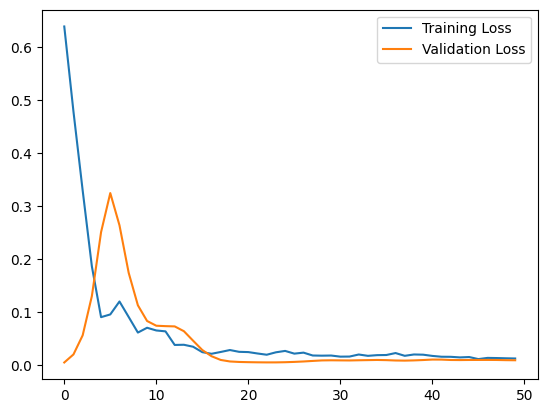

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Compare predictions with actual values using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R².
predictions = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
# 2.6 Identify Busy Hours
import numpy as np
busy_threshold = np.percentile(y_test, 90)  # Top 10% of traffic volumes

busy_hours = [i for i, pred in enumerate(predictions) if pred > busy_threshold]


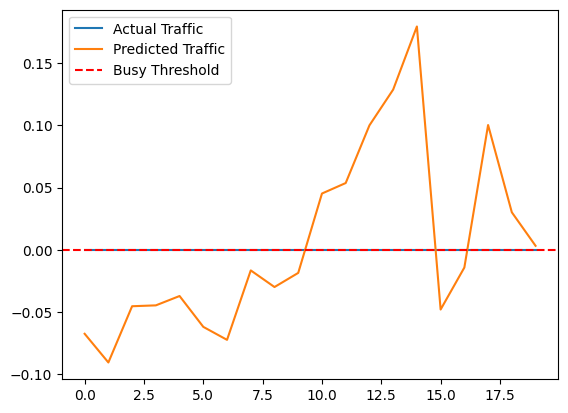

In [ ]:
# 2.7 Visulaize busy hours

import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Traffic')
plt.plot(predictions, label='Predicted Traffic')
plt.axhline(y=busy_threshold, color='r', linestyle='--', label='Busy Threshold')
plt.legend()
plt.show()


In [ ]:

# 2.8 Forecast Future Traffic using look-back

def forecast_traffic(model, last_sequence, steps):
    predictions = []
    current_sequence = last_sequence
    for _ in range(steps):
        pred = model.predict(current_sequence[np.newaxis, :, :])
        predictions.append(pred[0, 0])
        # Update the sequence
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = pred
    return predictions




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


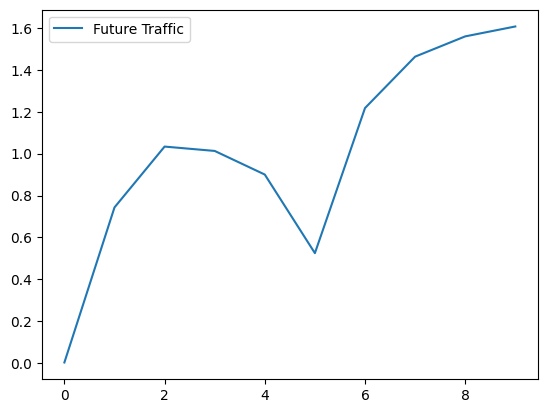

In [ ]:
# Generate forecasts for 10 hours

future_traffic = forecast_traffic(model, X_test[-1], steps=10)
plt.plot(range(len(future_traffic)), future_traffic, label='Future Traffic')
plt.legend()
plt.show()
